In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [23]:
eval=pd.read_csv('C:/Users/hp/Downloads/leftover/Car evaluation/car.csv',names=['buying','maint','doors','persons','lug_boot','safety','class'])

In [24]:
car=pd.DataFrame(eval)
car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [27]:
for i in car.columns:
    print(car[i].value_counts())

vhigh    432
low      432
high     432
med      432
Name: buying, dtype: int64
vhigh    432
low      432
high     432
med      432
Name: maint, dtype: int64
4    432
3    432
2    432
5    432
Name: doors, dtype: int64
4    576
2    576
7    576
Name: persons, dtype: int64
small    576
big      576
med      576
Name: lug_boot, dtype: int64
low     576
high    576
med     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [26]:
car['doors']=car['doors'].replace('5more','5')
car['persons']=car['persons'].replace('more','7')

In [53]:
car.shape

(1728, 7)

In [30]:
car.dtypes

buying      object
maint       object
doors        int64
persons      int64
lug_boot    object
safety      object
class       object
dtype: object

In [29]:
car['doors']=pd.to_numeric(car['doors'])
car['persons']=pd.to_numeric(car['persons'])

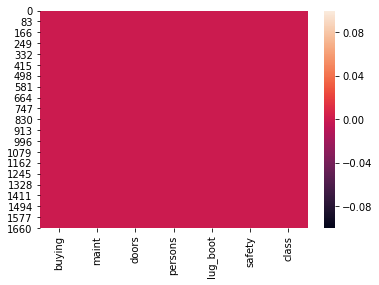

In [11]:
sns.heatmap(car.isnull())

In [31]:
car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


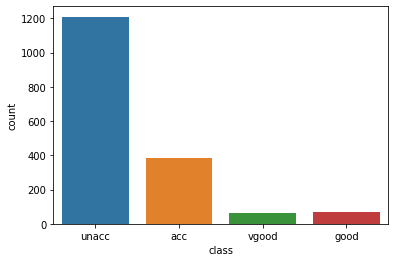

In [32]:
sns.countplot(car['class'])

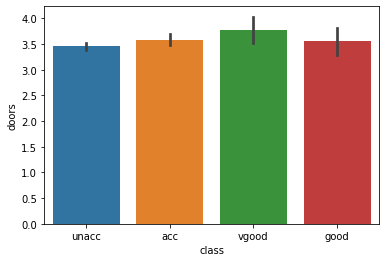

In [33]:
sns.barplot(x='class',y='doors',data=car)

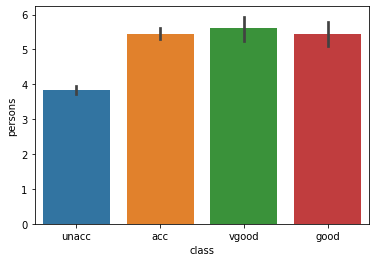

In [34]:
sns.barplot(x='class',y='persons',data=car)

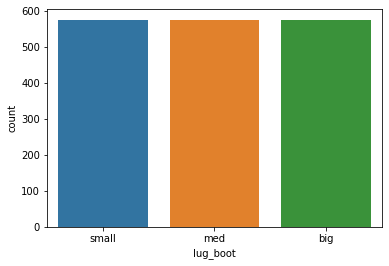

In [35]:
sns.countplot(car['lug_boot'])

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in car.columns:
    if car[col].dtypes==object:
        car[col]=le.fit_transform(car[col].astype(str))

In [38]:
car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,2,1,2
1,3,3,2,2,2,2,2
2,3,3,2,2,2,0,2
3,3,3,2,2,1,1,2
4,3,3,2,2,1,2,2


shaping the data

In [39]:
x=car.iloc[:,:-1]
y=car.iloc[:,-1]

In [40]:
def random(alg):
    r_state=0
    for r_score in range(43,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        accuracy=accuracy_score(y_test,pred)
        if accuracy > r_state:
            r_state=accuracy
            final_r=r_score
    print(accuracy,'at',final_r)

In [41]:
def model(alg):
    ml=alg
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    ml.score(x_train,y_train)
    print(accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred))

In [42]:
def cross_val(alg):
    score=cross_val_score(alg,x,y,cv=5)
    print(score.mean())
    print(score.std())

In [43]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
random(lr)

0.7162872154115587 at 73


In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=73)
model(lr)

0.7320490367775832
              precision    recall  f1-score   support

           0       0.40      0.19      0.26       110
           1       0.00      0.00      0.00        22
           2       0.77      0.94      0.85       421
           3       0.25      0.06      0.09        18

    accuracy                           0.73       571
   macro avg       0.35      0.30      0.30       571
weighted avg       0.65      0.73      0.68       571

[[ 21   0  86   3]
 [  0   0  22   0]
 [ 25   0 396   0]
 [  7   0  10   1]]


In [46]:
cross_val(lr)

0.6614867589729803
0.03126235498773989


In [47]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
random(dtc)

0.9807355516637478 at 45


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=45)
model(dtc)

0.9859894921190894
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       126
           1       0.91      0.91      0.91        22
           2       1.00      0.99      0.99       402
           3       1.00      1.00      1.00        21

    accuracy                           0.99       571
   macro avg       0.97      0.97      0.97       571
weighted avg       0.99      0.99      0.99       571

[[125   0   1   0]
 [  2  20   0   0]
 [  3   2 397   0]
 [  0   0   0  21]]


In [49]:
cross_val(dtc)

0.7859826589595376
0.10754047481675459


In [50]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
random(mnb)

0.7145359019264448 at 97


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=97)
model(mnb)

0.7443082311733801
              precision    recall  f1-score   support

           0       0.65      0.12      0.20       126
           1       0.00      0.00      0.00        14
           2       0.75      0.99      0.85       415
           3       0.00      0.00      0.00        16

    accuracy                           0.74       571
   macro avg       0.35      0.28      0.26       571
weighted avg       0.69      0.74      0.66       571

[[ 15   0 111   0]
 [  0   0  14   0]
 [  5   0 410   0]
 [  3   0  13   0]]


In [59]:
cross_val(mnb)

0.6892391450463771
0.01942137430795137


In [55]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':range(1,40)}
grid=GridSearchCV(kn,parameters,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'n_neighbors': 5}

In [56]:
knn=KNeighborsClassifier(n_neighbors=5)
random(knn)

0.8966725043782837 at 61


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=61)
model(knn)

0.9211908931698775
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       124
           1       0.78      0.39      0.52        18
           2       0.96      0.98      0.97       409
           3       0.92      0.60      0.73        20

    accuracy                           0.92       571
   macro avg       0.87      0.71      0.76       571
weighted avg       0.92      0.92      0.92       571

[[106   1  17   0]
 [ 10   7   0   1]
 [  8   0 401   0]
 [  6   1   1  12]]


In [61]:
cross_val(knn)

0.702742304073128
0.1057722021540924


In [62]:
from sklearn.svm import SVC
svm=SVC()
parameters={'kernel':['rbf','linear'],'C':[1,10,100]}
grid=GridSearchCV(svm,parameters,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 100, 'kernel': 'rbf'}

In [63]:
svm=SVC(kernel='rbf')
random(svm)

0.8598949211908932 at 98


In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=98)
model(svm)

0.9089316987740805
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       120
           1       0.33      0.05      0.09        20
           2       0.96      0.97      0.96       411
           3       1.00      0.95      0.97        20

    accuracy                           0.91       571
   macro avg       0.76      0.70      0.70       571
weighted avg       0.89      0.91      0.90       571

[[100   2  18   0]
 [ 19   1   0   0]
 [ 12   0 399   0]
 [  1   0   0  19]]


In [65]:
cross_val(svm)

0.7605424116144642
0.09621348379602729


In [70]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators':[10,100,500]}
grid=GridSearchCV(rf,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'n_estimators': 500}

In [71]:
rf=RandomForestClassifier(n_estimators=500)
random(rf)

0.9737302977232924 at 98


In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=98)
model(rf)

0.9824868651488616
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       120
           1       0.88      0.75      0.81        20
           2       1.00      1.00      1.00       411
           3       1.00      0.95      0.97        20

    accuracy                           0.98       571
   macro avg       0.96      0.92      0.94       571
weighted avg       0.98      0.98      0.98       571

[[117   2   1   0]
 [  5  15   0   0]
 [  1   0 410   0]
 [  1   0   0  19]]


In [73]:
cross_val(rf)

0.8137552090334722
0.06660289097526077


In [74]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={'n_estimators':[10,100,500],'learning_rate':[1,0.1,0.01,0.001]}
grid=GridSearchCV(gbc,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [75]:
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1)
random(gbc)

0.9964973730297724 at 45


In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=45)
model(gbc)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00       402
           3       1.00      1.00      1.00        21

    accuracy                           1.00       571
   macro avg       1.00      1.00      1.00       571
weighted avg       1.00      1.00      1.00       571

[[126   0   0   0]
 [  0  22   0   0]
 [  0   0 402   0]
 [  0   0   0  21]]


In [77]:
cross_val(gbc)

0.8305350181476004
0.09499176166636446
